In [14]:
import pandas as pd
import numpy as np
import tensorflow as tf

from random import randint

from keras.preprocessing import sequence 
from keras.datasets import imdb

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Conv2D, Embedding, Flatten

from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [2]:
digits = load_digits()

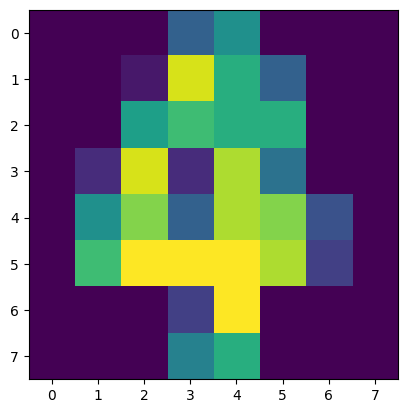

In [3]:
X = digits['images']
N = X.shape[0]
plt.imshow(X[randint(0,N)])
#X = X.reshape((-1,8,8,))

In [4]:
binarizer = LabelBinarizer()
Y = binarizer.fit_transform(digits['target'])
Y.shape

(1797, 10)

In [5]:
X_test, X_train, Y_test, Y_train = train_test_split(X,Y,train_size=0.9)

In [6]:
model = Sequential()
model.add(Conv2D(3, 2, activation='softmax', input_shape=(8,8,1,)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', 
              optimizer = 'adamax', 
              metrics = ['accuracy'])

2022-12-12 12:31:32.812104: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/kaygun/local/lib
2022-12-12 12:31:32.812154: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-12 12:31:32.812191: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ada): /proc/driver/nvidia/version does not exist
2022-12-12 12:31:32.812716: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
model.fit(X_train, Y_train,
          batch_size = 32,
          epochs = 15,
          validation_data = (X_test, Y_test))

Epoch 1/15
6/6 [==============================] - 1s 104ms/step - loss: 0.0375 - accuracy: 0.9778 - val_loss: 0.0911 - val_accuracy: 0.8491
Epoch 2/15
6/6 [==============================] - 0s 63ms/step - loss: 0.0362 - accuracy: 0.9833 - val_loss: 0.0904 - val_accuracy: 0.8510
Epoch 3/15
6/6 [==============================] - 0s 77ms/step - loss: 0.0350 - accuracy: 0.9833 - val_loss: 0.0892 - val_accuracy: 0.8547
Epoch 4/15
6/6 [==============================] - 0s 70ms/step - loss: 0.0342 - accuracy: 0.9833 - val_loss: 0.0883 - val_accuracy: 0.8553
Epoch 5/15
6/6 [==============================] - 0s 85ms/step - loss: 0.0328 - accuracy: 0.9833 - val_loss: 0.0876 - val_accuracy: 0.8571
Epoch 6/15
6/6 [==============================] - 0s 79ms/step - loss: 0.0318 - accuracy: 0.9889 - val_loss: 0.0870 - val_accuracy: 0.8565
Epoch 7/15
6/6 [==============================] - 0s 78ms/step - loss: 0.0309 - accuracy: 0.9833 - val_loss: 0.0865 - val_accuracy: 0.8541
Epoch 8/15
6/6 [==========

In [13]:
Y_pred = model.predict(X_test).argmax(axis=1)
YY_test = Y_test.argmax(axis=1)
confusion_matrix(YY_test,Y_pred)

51/51 [==============================] - 0s 5ms/step


array([[160,   0,   0,   0,   1,   0,   1,   0,   0,   0],
       [  0, 132,   0,   2,   1,   1,   0,   0,  13,  16],
       [  0,   5, 138,   8,   0,   1,   0,   0,   3,   2],
       [  0,   3,   1, 135,   0,   4,   1,   1,  10,  12],
       [  0,   3,   0,   0, 149,   0,   0,   7,   0,   0],
       [  2,   3,   0,   0,   2, 131,   1,   2,   2,  25],
       [  4,   7,   2,   0,   1,   0, 146,   0,   2,   0],
       [  0,   0,   0,   0,   6,   0,   0, 152,   3,   0],
       [  1,   6,   1,   2,   1,   1,   1,   2, 127,  13],
       [  1,   1,   0,   1,   3,   5,   0,  12,   5, 133]])

In [15]:
print(classification_report(YY_test,Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       162
           1       0.82      0.80      0.81       165
           2       0.97      0.88      0.92       157
           3       0.91      0.81      0.86       167
           4       0.91      0.94      0.92       159
           5       0.92      0.78      0.84       168
           6       0.97      0.90      0.94       162
           7       0.86      0.94      0.90       161
           8       0.77      0.82      0.79       155
           9       0.66      0.83      0.73       161

    accuracy                           0.87      1617
   macro avg       0.88      0.87      0.87      1617
weighted avg       0.88      0.87      0.87      1617

